<a href="https://colab.research.google.com/github/88FaHaD/Deep-learning/blob/main/CNN_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiclass Image Classification
## 10 Classes of food
### Steps
1. Become one witht the data
2. Preprocess the data
3. Create a model(start with baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat the baseline)
7. Repeat until satisfied

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile

In [2]:
!rm -f 10_food_classes_all_data.zip  # Remove any partially downloaded file
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2025-01-22 22:48:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.207, 142.250.145.207, 74.125.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  38.6MB/s    in 14s     

2025-01-22 22:48:18 (36.4 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [3]:
!ls



10_food_classes_all_data.zip  sample_data


In [4]:
with zipfile.ZipFile("10_food_classes_all_data.zip", "r") as zip_ref:
    zip_ref.extractall()


In [5]:
!file 10_food_classes_all_data.zip


10_food_classes_all_data.zip: Zip archive data, at least v2.0 to extract, compression method=store


In [6]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.

#set up train and test directory

In [7]:
train_dir="10_food_classes_all_data/train/"
test_dir="10_food_classes_all_data/test/"

In [8]:
import pathlib
data_dir=pathlib.Path(train_dir)
class_names=np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


# Become one with data
### Visualize

In [9]:
import random
from pathlib import Path
from PIL import Image

def display_random_image(data_dir, class_names):
    random_class = random.choice(class_names)
    class_dir = Path(data_dir) / random_class
    random_image_path = random.choice(list(class_dir.glob('*')))
    img = Image.open(random_image_path)
    plt.imshow(img)
    plt.title(f"Class: {random_class}")
    plt.axis('off')
    plt.show()




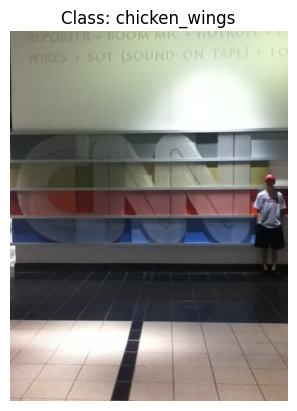

In [10]:
display_random_image(train_dir, class_names)

# Preprocess the data
1. turn all data into numbers
2. make sure all tensors are in right sape
3. scale features (normalize or standarize)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Rescale
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator instances with augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalize pixel values to [0, 1]
    rotation_range=20,     # Randomly rotate images up to 20 degrees
    width_shift_range=0.2, # Randomly shift images horizontally
    height_shift_range=0.2,# Randomly shift images vertically
    shear_range=0.2,       # Shear transformations
    zoom_range=0.2,        # Zoom in/out
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'    # Fill empty pixels after transformations
)

# No augmentation for test data, only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)
#laod data from directory and turn them into batches
train_data=train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode='categorical')
test_data=test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# Create a model with baseline adn fiting the model

In [13]:
tf.keras.backend.clear_session()


In [14]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),  # Added Input layer as the first layer
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

model1.compile(loss="categorical_crossentropy",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

history1 = model1.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                      validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


235/235 ━━━━━━━━━━━━━━━━━━━━ 136s 519ms/step - accuracy: 0.1145 - loss: 2.3113 - val_accuracy: 0.1632 - val_loss: 2.2219
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 110us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


235/235 ━━━━━━━━━━━━━━━━━━━━ 124s 477ms/step - accuracy: 0.2012 - loss: 2.1721 - val_accuracy: 0.2876 - val_loss: 2.0167
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 69us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 114s 475ms/step - accuracy: 0.2592 - loss: 2.0786 - val_accuracy: 0.3344 - val_loss: 1.9281


# Evaluating the model

In [15]:
model1.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 0.3502 - loss: 1.9092


[1.9281271696090698, 0.3343999981880188]

# Ploting loss curves

In [16]:
def plot_metrics(history):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

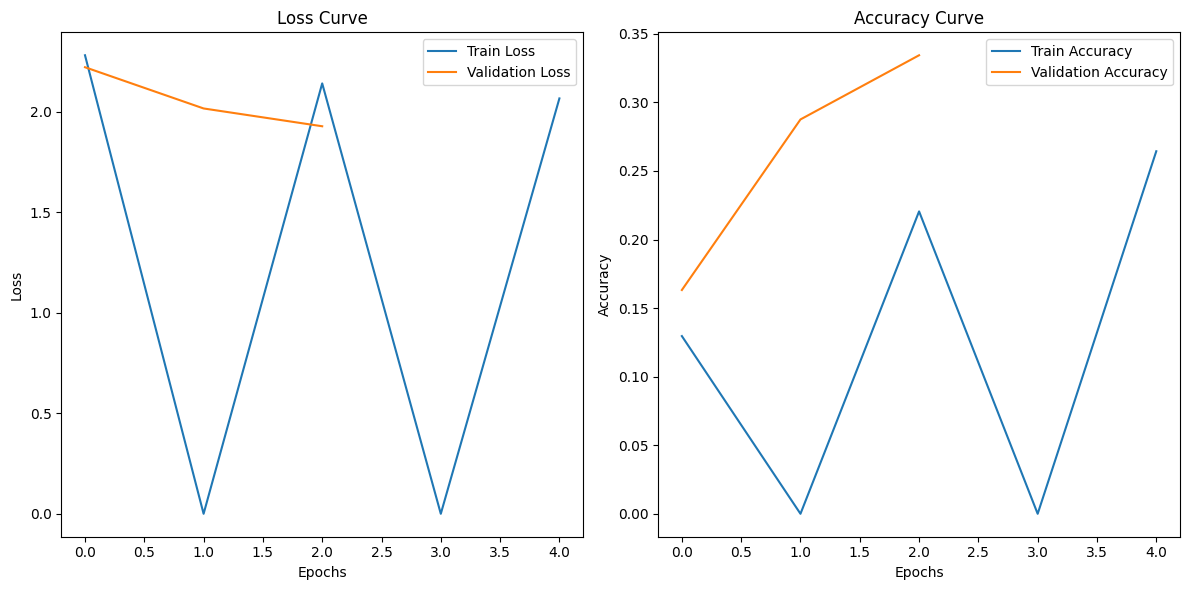

In [17]:
plot_metrics(history1)

# Improving the model

* ** Get more data **
* ** Simplify the model :->** Because of overfiting reduce the number of layers or neurons.
* ** Use data augmentation **
* ** Transfer Learning **


In [18]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout regularization
    tf.keras.layers.Dense(10, activation='softmax')  # Output layer
])

model2.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Reduced learning rate
    metrics=['accuracy']
)

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history2 = model2.fit(train_data,epochs=10,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data),callbacks=[early_stopping])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 138s 541ms/step - accuracy: 0.1190 - loss: 2.3494 - val_accuracy: 0.1776 - val_loss: 2.2254
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


235/235 ━━━━━━━━━━━━━━━━━━━━ 117s 488ms/step - accuracy: 0.1848 - loss: 2.2095 - val_accuracy: 0.2488 - val_loss: 2.1141
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 116us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 140s 481ms/step - accuracy: 0.2134 - loss: 2.1563 - val_accuracy: 0.2816 - val_loss: 2.0213
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 115s 474ms/step - accuracy: 0.2409 - loss: 2.1090 - val_accuracy: 0.3184 - val_loss: 1.9663
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 72us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 115s 480ms/step - accuracy: 0.2514 - loss: 2.0941 - val_accuracy: 0.3348 - val_loss: 1.9106
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 107us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [19]:
model2.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 90ms/step - accuracy: 0.3486 - loss: 1.8964


[1.9105777740478516, 0.33480000495910645]

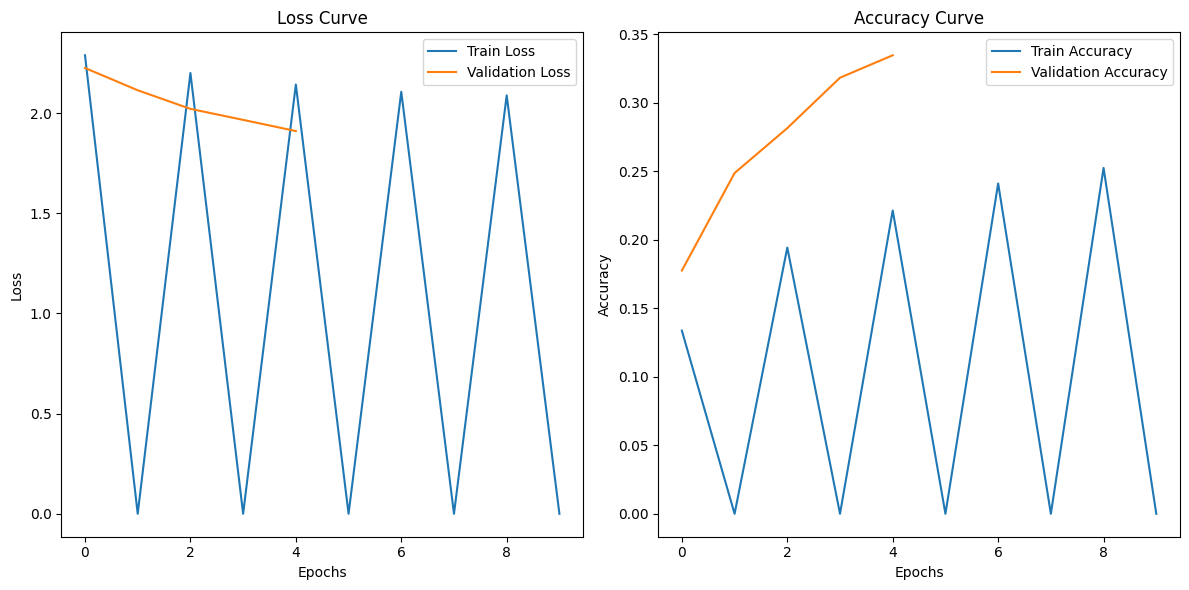

In [20]:
plot_metrics(history2)

# Model 3 tiny VGG Architecture

In [21]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Conv2D

In [22]:
len(train_data),len(test_data)

(235, 79)

In [23]:
model3 = models.Sequential([
    layers.Input(shape=(224, 224, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model3.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit(train_data, epochs=10,steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))




Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 123s 495ms/step - accuracy: 0.1616 - loss: 2.3727 - val_accuracy: 0.2816 - val_loss: 1.9702
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 94us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 116s 483ms/step - accuracy: 0.2841 - loss: 2.0153 - val_accuracy: 0.3248 - val_loss: 1.8906
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 139s 481ms/step - accuracy: 0.2953 - loss: 1.9840 - val_accuracy: 0.2988 - val_loss: 2.0088
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 496ms/step - accuracy: 0.3268 - loss: 1.9277 - val_accuracy: 0.4060 - val_loss: 1.7351
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 118s 490ms/step - accuracy: 0.3533 - loss: 1.8769 - 

In [24]:
model3.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.4388 - loss: 1.6764


[1.6910592317581177, 0.430400013923645]

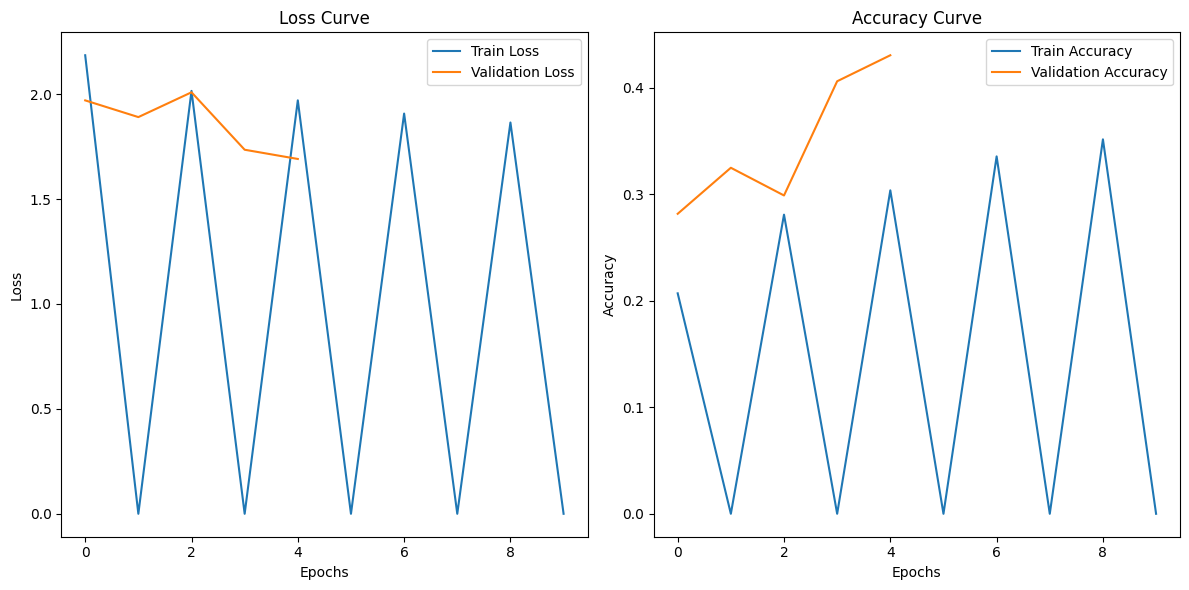

In [25]:
plot_metrics(history3)

In [31]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [32]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# Imporoved Cnn model

In [34]:
model4 =tf.keras.Sequential([
  layers.Input(shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPooling2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPooling2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model4.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)





# Improving overall

# Steps to Avoid "Ran Out of Data" During Model Training

Here's a simple explanation:

* **Steps per Epoch**:
  - Divide the total number of training samples by the batch size.
  - Formula:  
    `steps_per_epoch = Total training samples / Batch size`
  
* **Validation Steps**:
  - Divide the total number of validation samples by the batch size.
  - Formula:  
    `validation_steps = Total validation samples / Batch size`

* **Example**:
  - Total training samples = 7500
  - Total validation samples = 2500
  - Batch size = 32

* **Calculations**:
  - Steps per epoch = 7500 ÷ 32 = 234
  - Validation steps = 2500 ÷ 32 = 78


In [35]:
history4 = model4.fit(
    train_data,
    epochs=5,  # Adjust the number of epochs as needed
    steps_per_epoch=234,  # Calculated steps per epoch (7500 ÷ 32)
    validation_data=test_data,
    validation_steps=78  # Calculated validation steps (2500 ÷ 32)
)

Epoch 1/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 37s 140ms/step - accuracy: 0.1912 - loss: 2.2532 - val_accuracy: 0.3205 - val_loss: 1.9781
Epoch 2/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2188 - loss: 1.9471 - val_accuracy: 0.5000 - val_loss: 1.4733
Epoch 3/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 40s 167ms/step - accuracy: 0.4010 - loss: 1.7575 - val_accuracy: 0.3498 - val_loss: 1.8680
Epoch 4/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 97us/step - accuracy: 0.5938 - loss: 1.4138 - val_accuracy: 0.0000e+00 - val_loss: 2.7615
Epoch 5/5
234/234 ━━━━━━━━━━━━━━━━━━━━ 33s 140ms/step - accuracy: 0.6011 - loss: 1.2464 - val_accuracy: 0.3317 - val_loss: 2.0479


In [36]:
model4.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - accuracy: 0.3434 - loss: 2.0288


[2.047269821166992, 0.3319999873638153]

# Makeing prediction on random image

In [37]:
import random
from pathlib import Path
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import tensorflow as tf

def predict_random_multiclass_image(data_dir, class_names, model):
    random_class = random.choice(class_names)
    class_dir = Path(data_dir) / random_class
    random_image_path = random.choice(list(class_dir.glob('*')))
    img = load_img(random_image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = tf.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    predicted_class = class_names[tf.argmax(predictions[0])]
    plt.imshow(img)
    plt.title(f"Actual: {random_class}\nPredicted: {predicted_class}")
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


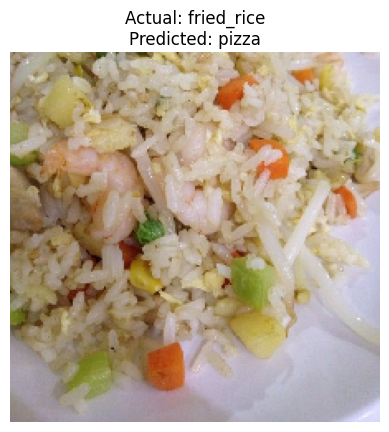

In [45]:
predict_random_multiclass_image(test_dir, class_names, model4)